Para esta atividade iremos usar um conjunto de dados sobre preços de imóveis. O conjunto original pode ser encontrado no [kaggle](https://www.kaggle.com/datasets/gunhee/koreahousedata). Os dados que usaremos foram alterados para facilitar as análises.

In [1]:
# Importando dependências externas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.api import het_goldfeldquandt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools.eval_measures import mse, rmse, meanabs
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow

In [2]:
# Omitindo as mensagens de aviso "Warnings"
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Como se trata de um dataset de Londres, configurei o 'locale' para o Reino Unido para formatar os valores monetários

# Importando a biblioteca
import locale
# Definindo o 'locale'
locale.setlocale(locale.LC_ALL, 'en_GB.UTF-8')

'en_GB.UTF-8'

# Regressão Linear Simples

## Atividade 1: Importe os dados e verifique se há dados faltantes.

In [4]:
# Carregando os dados
df_original = pd.read_csv('2.4_Regressao_Linear_Entrega_Dados.csv')
df_original.head(2)

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_escritorios_publicos_perto,qtde_hospitais_perto,qtde_lojas_departamento_perto,qtde_shoppings_perto,qtde_estacionamentos_perto,qtde_escolas_fundamental1_perto,qtde_escolas_fundamental2_perto,qtde_escolas_medio_perto,qtde_universidades_perto
0,849552,2006,2007,"75,623042",3,individual,5min~10min,10min~15min,0,2,1,1,1,0,3,2,2,2
1,307962,1985,2007,"54,534061",8,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0


# MODELO 1

In [5]:
# Criando uma cópia do DataFrame para o modelo 1
df1 = df_original.copy()

In [6]:
# Avaliando os dados Pt. 1 de 2
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
preco,5891.0,1.327309e+06,638305.118677,196458.0,865482.0,1247784.0,1746900.0,3515040.0
ano_construcao,5891.0,2.002967e+03,8.811782,1978.0,1993.0,2006.0,2008.0,2015.0
ano_Venda,5891.0,2.012692e+03,2.905488,2007.0,2010.0,2013.0,2015.0,2017.0
andar,5891.0,1.202631e+01,7.548743,1.0,6.0,11.0,17.0,43.0
qtde_elevadores,5891.0,1.114599e+01,7.806232,0.0,5.0,11.0,16.0,27.0
qtde_escritorios_publicos_perto,5891.0,4.141572e+00,1.793496,0.0,3.0,5.0,5.0,7.0
qtde_hospitais_perto,5891.0,1.296045e+00,0.479760,0.0,1.0,1.0,2.0,2.0
qtde_lojas_departamento_perto,5891.0,8.962825e-01,0.810964,0.0,0.0,1.0,2.0,2.0
qtde_shoppings_perto,5891.0,9.414361e-01,0.401355,0.0,1.0,1.0,1.0,2.0
qtde_estacionamentos_perto,5891.0,6.542183e-01,0.658320,0.0,0.0,1.0,1.0,2.0


In [7]:
# Avaliando os dados Pt. 2 de 2
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   preco                            5891 non-null   int64 
 1   ano_construcao                   5891 non-null   int64 
 2   ano_Venda                        5891 non-null   int64 
 3   m2                               5891 non-null   object
 4   andar                            5891 non-null   int64 
 5   tipo_Aquecimento                 5891 non-null   object
 6   tempo_ate_onibus                 5891 non-null   object
 7   tempo_ate_metro                  5891 non-null   object
 8   qtde_elevadores                  5891 non-null   int64 
 9   qtde_escritorios_publicos_perto  5891 non-null   int64 
 10  qtde_hospitais_perto             5891 non-null   int64 
 11  qtde_lojas_departamento_perto    5891 non-null   int64 
 12  qtde_shoppings_perto             5

In [8]:
# Verificando se há dados faltantes
print(f'Qtd de dados do tipo NA: \n {df1.isna().sum()} \n | Qtd de dados do tipo Null: \n {df1.isnull().sum()}')

Qtd de dados do tipo NA: 
 preco                              0
ano_construcao                     0
ano_Venda                          0
m2                                 0
andar                              0
tipo_Aquecimento                   0
tempo_ate_onibus                   0
tempo_ate_metro                    0
qtde_elevadores                    0
qtde_escritorios_publicos_perto    0
qtde_hospitais_perto               0
qtde_lojas_departamento_perto      0
qtde_shoppings_perto               0
qtde_estacionamentos_perto         0
qtde_escolas_fundamental1_perto    0
qtde_escolas_fundamental2_perto    0
qtde_escolas_medio_perto           0
qtde_universidades_perto           0
dtype: int64 
 | Qtd de dados do tipo Null: 
 preco                              0
ano_construcao                     0
ano_Venda                          0
m2                                 0
andar                              0
tipo_Aquecimento                   0
tempo_ate_onibus                   0
te

## Atividade 2: Selecione apenas as variáveis `preco` e `m2`, aplique o logaritmo natural na variável `m2` e verifique a correlação entre as variáveis.

In [9]:
# Selecionando as variáveis de interesse
df1 = df1[['preco', 'm2']]
df1.head(2)

,preco,m2
0,849552,"75,623042"
1,307962,"54,534061"


In [10]:
# Convertendo a variável m2 para float
df1['m2'] = df1['m2'].str.replace(',', '.').astype(float)
print(df1.dtypes)

preco      int64
m2       float64
dtype: object


In [11]:
# Aplicando o logaritmo natural na variável m2
df1['m2_log'] = np.log(df1['m2'])
df1.head(2)

,preco,m2,m2_log
0,849552,75.623042,4.325761
1,307962,54.534061,3.998825


In [12]:
# Verificando se há correlação entre as variáveis 'preco' e m2_log
df1[['preco', 'm2_log']].corr()

,preco,m2_log
preco,1.000000,0.706048
m2_log,0.706048,1.000000


## Atividade 3: Crie um modelo de regressão linear simples e encontre os coeficientes do modelo.

In [13]:
# Atribuindo as variáveis X e y
X1 = df1['m2_log']
y1 = df1['preco']

In [14]:
# Adicionando a constante
X1 = sm.add_constant(X1)

# Visualizando o resultado
X1.head(2)

,const,m2_log
0,1.0,4.325761
1,1.0,3.998825


In [15]:
# Estabelecendo o nível de significância
alpha = 0.05

### Criação e visualização do modelo

In [16]:
# Criando o modelo de regressão linear simples

# Método: Ordinary Least Squares (OLS), ou método dos mínimos quadrados
model1 = sm.OLS(y1, X1).fit()

# Visualizando o modelo
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5854.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:13:25   Log-Likelihood:                -85068.
No. Observations:                5891   AIC:                         1.701e+05
Df Residuals:                    5889   BIC:                         1.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.37e+06   6.17e+04    -54.642      0.0

In [17]:
# Visualizando os parâmetros do Modelo 1
print(model1.params)

const    -3.370460e+06
m2_log    1.066759e+06
dtype: float64


In [18]:
# Calculando os resíduos
model1_resid = model1.resid
print(model1_resid)

0      -3.945320e+05
1      -5.873606e+05
2      -6.032906e+05
3       5.068284e+04
4      -7.398490e+05
            ...     
5886    1.075735e+06
5887    4.346068e+05
5888    8.325286e+05
5889    1.089082e+05
5890    1.050227e+06
Length: 5891, dtype: float64


# Modelo 1 completo

`y = -3.37e+06 + 1.067e+06 * X['m2_log']`
Nota: O valor de `R² (0.499)` é aceitável para um modelo de regressão linear simples, mas não é um valor alto. Isso indica que o modelo não explica muito bem a variável dependente.

## Atividade 4: Verifique os pressupostos da regressão linear.

In [19]:
# Criando um dicionário para armazenar as conclusões sobre cada pressuposto
conclusions1 = {}

## Linearidade
### Métodos aplicados: Gráfico de dispersão e Teste Rainbow

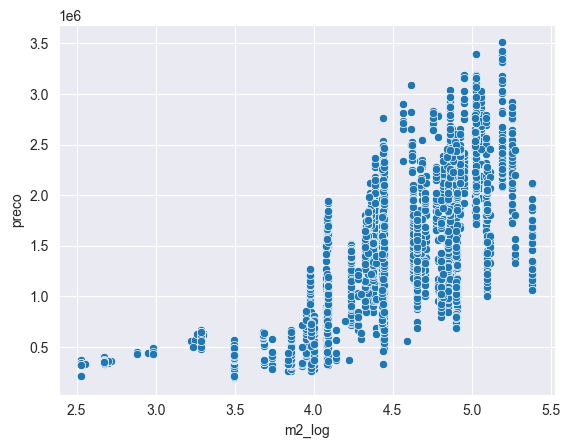

In [20]:
# Gerando o gráfico de dispersão
sns.scatterplot(x='m2_log', y='preco', data=df1);

### Teste Rainbow para confirmar linearidade
- H0: Não há relação linear entre a variável independente e a variável dependente
- H1: Há relação linear entre a variável independente e a variável dependente
- Pressuposto para uso da regresão linear: H0 deve ser rejeitada

In [21]:
# Teste Rainbow para confirmar linearidade

# Realizando o teste Rainbow
rainbow_statistic1, rainbow_p_value1 = linear_rainbow(model1)

# Imprimindo o resultado do teste
print('Estatística Rainbow:', rainbow_statistic1)
print('Valor-p Rainbow:', rainbow_p_value1)
print('-------------------------------------')

# Comparando o p-valor com o nível de significância alpha
if rainbow_p_value1 < alpha:
    print('p-valor < alfa. H0 REJEITADA. Há evidências de que o modelo SATISFAZ a suposição de linearidade.')
    conclusion_linearity1 = { 'Linearidade': 'Pressuposto SATISFEITO'}
else:
    print('p-valor > alfa. H0 NÃO REJEITADA. Há evidências de que o modelo NÃO SATISFAZ a suposição de linearidade.')
    conclusion_linearity1 = { 'Linearidade': 'Pressuposto NÃO SATISFEITO'}

# Armazenando a conclusão no dicionário
conclusions1.update(conclusion_linearity1)

Estatística Rainbow: 1.9900346294793798
Valor-p Rainbow: 1.2749919970583877e-76
-------------------------------------
p-valor < alfa. H0 REJEITADA. Há evidências de que o modelo SATISFAZ a suposição de linearidade.


## Homocedasticidade
### Método aplicado: Teste de Goldfeld Quandt

#### Hipóteses:
- H0: Há homocedasticidade (variância constante dos resíduos)
- H1: Não há homocedasticidade (variância não constante dos resíduos)
- Pressuposto para uso da regressão linear: H0 NÃO deve ser rejeitada

In [22]:
# Verificando a homocedasticidade
stat, p_value, _ = het_goldfeldquandt(model1_resid, X1)
print(f'P-valor é igual a: {p_value}')
print('-------------------------------------')

# Comparando o p-valor com o nível de significância alpha
if p_value < alpha:
    print('P-valor < alfa. H0 REJEITADA. Conclusão: Há evidências de que os resíduos NÃO SÃO homocedásticos.')
    conclusion_homocedasticity1 = { 'Homocedasticidade': 'Pressuposto NÃO SATISFEITO'}
else:
    print('P-valor > alfa. H0 NÃO REJEITADA. Conclusão: Há evidências de que os resíduos SÃO homocedásticos.')
    conclusion_homocedasticity1 = { 'Homocedasticidade': 'Pressuposto SATISFEITO'}

# Armazenando a conclusão no dicionário
conclusions1.update(conclusion_homocedasticity1)

P-valor é igual a: 3.423253608687636e-22
-------------------------------------
P-valor < alfa. H0 REJEITADA. Conclusão: Há evidências de que os resíduos NÃO SÃO homocedásticos.


## Normalidade dos Resíduos
### Método aplicado: Teste de Shapiro-Wilk

### Hipóteses:
- H0: Os resíduos seguem distribuição normal
- H1: Os resíduos não seguem distribuição normal
- Pressuposto para uso da regressão linear: H0 NÃO deve ser rejeitada

In [23]:
# Aplicando teste de Shapiro-Wilk
stat, p_value = shapiro(model1_resid)

print(f'P-valor é igual a: {p_value}')
print('-------------------------------------')

if p_value < 0.05:
    print('P-valor < alfa. Conclusão: H0 REJEITADA. Há evidência de que os resíduos NÃO SEGUEM distribuição normal')
    conclusion_normality1 = {'Normalidade': 'Pressuposto NÃO SATISFEITO'}
else:
    print('P-valor > alfa. Conclusão: H0 NÃO REJEITADA. Há evidência de que os resíduos SEGUEM distribuição normal')
    conclusion_normality1 = {'Normalidade': 'Pressuposto SATISFEITO'}

# Armazenando a conclusão no dicionário
conclusions1.update(conclusion_normality1)

P-valor é igual a: 7.838917594454599e-26
-------------------------------------
P-valor < alfa. Conclusão: H0 REJEITADA. Há evidência de que os resíduos NÃO SEGUEM distribuição normal


## Autocorrelação dos Resíduos
### Método aplicado: Teste de Durbin-Watson
### Hipóteses:
- H0: Não existe correlação entre os resíduos
- H1: Existe correlação entre os resíduos
- Pressuposto para uso da regressão linear: H0 NÃO deve ser rejeitada

In [24]:
# Aplicando o teste de Durbin-Watson para verificar a autocorrelação dos resíduos
auto_correlation = durbin_watson(model1_resid)
print(auto_correlation)

# Valores entre 1.5 e 2.5 indicam que não há autocorrelação
if auto_correlation < 1.5 or auto_correlation > 2.5:
    print('H0 REJEITADA. Há evidência de autocorrelação dos resíduos')
    conclusion_autocorrelation1 = {'Autocorrelação dos resíduos': 'Pressuposto NÃO SATISFEITO'}
else:
    print('H0 NÃO REJEITADA. Não há evidência de autocorrelação dos resíduos')
    conclusion_autocorrelation1 = {'Autocorrelação dos resíduos': 'Pressuposto SATISFEITO'}

# Armazenando a conclusão no dicionário
conclusions1.update(conclusion_autocorrelation1)

0.7433704819691179
H0 REJEITADA. Há evidência de autocorrelação dos resíduos


## Multicolinearidade
### Método aplicado: Fator de Inflação da Variância (VIF)
### Hipóteses:
- H0: Não há multicolinearidade
- H1: Há multicolinearidade

In [25]:
print('Conclusão: NÃO APLICÁVEL porque há somente uma variável X')
conclusion_multicolinearity1 = {'Multicolinearidade': 'Não aplicável'}

# Armazenando a conclusão no dicionário
conclusions1.update(conclusion_multicolinearity1)

Conclusão: NÃO APLICÁVEL porque há somente uma variável X


## Resumo da avaliação dos pressupostos

In [26]:
# Criando função para resumir a verificação dos pressupostos
def assumptions_summary(conclusions):
    print('Resumo da verificação dos pressupostos:')
    print('-------------------------------------')
    for key, value in conclusions.items():
        if value == 'Pressuposto SATISFEITO':
            print(f'{key}: {value} ✅')
        else:
            print(f'{key}: {value} ❌')
    print('-------------------------------------')
    print('CONCLUSÃO GERAL:')
    # Condição que se 1 ou mais pressupostos não forem atendidos, a regressão linear não é aconselhável
    if 'Pressuposto NÃO SATISFEITO' in conclusions.values():
        print('❌ Atenção: Um ou mais pressupostos não foram atendidos. A regressão linear NÃO é aconselhável.')
    else:
        print('✅ Todos os pressupostos foram atendidos. A regressão linear é aconselhável.')

In [27]:
# Resumo da verificação dos pressupostos
assumptions_summary(conclusions1)

Resumo da verificação dos pressupostos:
-------------------------------------
Linearidade: Pressuposto SATISFEITO ✅
Homocedasticidade: Pressuposto NÃO SATISFEITO ❌
Normalidade: Pressuposto NÃO SATISFEITO ❌
Autocorrelação dos resíduos: Pressuposto NÃO SATISFEITO ❌
Multicolinearidade: Não aplicável ❌
-------------------------------------
CONCLUSÃO GERAL:
❌ Atenção: Um ou mais pressupostos não foram atendidos. A regressão linear NÃO é aconselhável.


# Regressão Linear Múltipla

## Atividade 5: Crie um modelo de regressão linear múltipla.

# MODELO 2

In [28]:
# Criando uma cópia do dataframe original
df2 = df_original.copy()

In [29]:
# Convertendo a variável m2 para float
df2['m2'] = df2['m2'].str.replace(',', '.').astype(float)

### Agrupando variáveis

In [30]:
# Vamos condensar algumas variáveis em uma única
df2['qtde_servicos'] = df2['qtde_hospitais_perto'] + \
                      df2['qtde_lojas_departamento_perto'] + \
                      df2['qtde_escritorios_publicos_perto'] + \
                      df2['qtde_escolas_fundamental1_perto'] + \
                      df2['qtde_escolas_fundamental2_perto'] + \
                      df2['qtde_escolas_medio_perto'] + \
                      df2['qtde_universidades_perto']

# excluindo as variáveis originais do DataFrame
df2.drop(['qtde_hospitais_perto','qtde_lojas_departamento_perto',
         'qtde_escritorios_publicos_perto','qtde_escolas_fundamental1_perto',
         'qtde_escolas_fundamental2_perto','qtde_escolas_medio_perto',
         'qtde_universidades_perto'],
        axis=1, inplace=True)

In [31]:
# criando nova variável
df2['qtde_conveniencia'] = df2['qtde_shoppings_perto'] + df2['qtde_estacionamentos_perto']

# excluindo variáveis do DataFrame
df2.drop(['qtde_shoppings_perto','qtde_estacionamentos_perto'],
        axis=1, inplace=True)

### Tratando os dados categóricos utilizando One Hot Encoding

In [32]:
# aplicando One Hot Encoding à variável tipo_Aquecimento
df_aux = pd.get_dummies(df2['tipo_Aquecimento'], prefix='tipo_Aquecimento')
df2 = pd.concat([df2, df_aux], axis=1)
df2.drop(['tipo_Aquecimento', 'tipo_Aquecimento_central'], axis=1, inplace=True)

In [33]:
# aplicando One Hot Encoding à variável tempo_ate_onibus
df_aux = pd.get_dummies(df2['tempo_ate_onibus'], prefix='tempo_ate_onibus')
df2 = pd.concat([df2, df_aux], axis=1)
df2.drop(['tempo_ate_onibus', 'tempo_ate_onibus_10min~15min'], axis=1, inplace=True)

In [34]:
# aplicando One Hot Encoding à variável tempo_ate_metro
df_aux = pd.get_dummies(df2['tempo_ate_metro'], prefix='tempo_ate_metro')
df2 = pd.concat([df2, df_aux], axis=1)
df2.drop(['tempo_ate_metro', 'tempo_ate_metro_no_bus_stop_nearby'], axis=1, inplace=True)

### Criando o modelo

In [35]:
# separando os dados em X e y
X2 = df2.drop('preco', axis=1)
y2 = df2['preco']

In [36]:
# Colocando os dados na mesma escala

# instanciando a função
scaler2 = StandardScaler()

# criando uma cópia dos valores
X_scaled2 = X2.copy()

# aplicando a padronização
X_scaled2[X_scaled2.columns] = scaler2.fit_transform(X_scaled2)

X_scaled2.head(2)

,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,0.344181,-1.959067,-0.370182,-1.195839,-1.427953,-0.723875,-0.772684,0.231641,-1.806284,1.854545,-0.938566,2.511759,-0.43931,-0.488514
1,-2.039194,-1.959067,-0.963752,-0.533420,-1.171726,-0.896304,0.524518,0.231641,0.553623,-0.539216,-0.938566,-0.398127,-0.43931,2.047024


In [37]:
# Criando o modelo
X2 = sm.add_constant(X_scaled2)
model2 = sm.OLS(y2, X2).fit()

In [38]:
# Visualizando os parâmetros do modelo2
print(model2.params)

const                          1.327309e+06
ano_construcao                 1.317201e+05
ano_Venda                      2.075267e+05
m2                             4.018310e+05
andar                          6.776331e+04
qtde_elevadores                7.917780e+04
qtde_servicos                 -8.736460e+04
qtde_conveniencia              5.713787e+03
tipo_Aquecimento_individual    6.703751e+04
tempo_ate_onibus_0~5min        2.700116e+05
tempo_ate_onibus_5min~10min    2.577272e+05
tempo_ate_metro_0-5min         7.402452e+04
tempo_ate_metro_10min~15min    4.994503e+04
tempo_ate_metro_15min~20min   -2.401399e+04
tempo_ate_metro_5min~10min     5.962786e+04
dtype: float64


## Atividade 6: Faça a previsão do preço de um apartamento com as seguinte características:
- ano_construcao = 2000
- ano_Venda = 2003
- m2 = 83
- andar = 2
- qtde_elevadores = 1
- qtde_servicos = 4
- qtde_conveniencia = 2
- tipo_Aquecimento_individual = 1
- tempo_ate_onibus_0~5min = 0
- tempo_ate_onibus_5min~10min = 1
- tempo_ate_metro_0-5min = 1
- tempo_ate_metro_10min~15min = 0
- tempo_ate_metro_15min~20min = 0
- tempo_ate_metro_5min~10min = 0

In [39]:
# Aplicando previsão

# Criando dicionário com os valores das variáveis X
prev_test2 = {
    'ano_construcao': 2000,
    'ano_Venda': 2003,
    'm2': 83,
    'andar': 2,
    'qtde_elevadores': 1,
    'qtde_servicos': 4,
    'qtde_conveniencia': 2,
    'tipo_Aquecimento_individual': 1,
    'tempo_ate_onibus_0~5min': 0,
    'tempo_ate_onibus_5min~10min': 1,
    'tempo_ate_metro_0-5min': 1,
    'tempo_ate_metro_10min~15min': 0,
    'tempo_ate_metro_15min~20min': 0,
    'tempo_ate_metro_5min~10min': 0
}

In [40]:
# Convertendo o dicionário em DataFrame
prev_test2 = pd.DataFrame([prev_test2])
prev_test2

,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,2000,2003,83,2,1,4,2,1,0,1,1,0,0,0


In [41]:
# Aplicando o StandardScaler ao DataFrame
prev_test_scaled2 = scaler2.transform(prev_test2)

In [42]:
# Inserindo a constante necessária para o modelo
prev_test_scaled2 = np.insert(prev_test_scaled2, 0,1)

In [43]:
# Realizando previsão com o modelo 2 e os valores do dicionário
prev_test_result2 = model2.predict(prev_test_scaled2)[0] # o índice 0 é para retornar o valor e não o array
prev_test_result2 = locale.currency(prev_test_result2, grouping=True, symbol=True)
print(f'O preço previsto para um apartamento com essas características é: {prev_test_result2}')

O preço previsto para um apartamento com essas características é: £580,413.42


## Atividade 7: Verifique os pressupostos do modelo.

In [44]:
# Criando um dicionário para armazenar as conclusões sobre cada pressuposto
conclusions2 = {}

## Homocedasticidade dos Resíduos

In [45]:
# Criando função para checar a Homocedasticidade
def check_homocedasticity(model, alpha=0.05):
    resid = model.resid
    X = model.model.exog
    test = het_goldfeldquandt(resid, X)
    p_value = test[1]
    if p_value < alpha:
        conclusion = 'Pressuposto NÃO SATISFEITO'
    else:
        conclusion = 'Pressuposto SATISFEITO'

    return {'Homocedasticidade': conclusion}

## Normalidade dos Resíduos

In [46]:
# Criando função para verificar a normalidade dos resíduos
def check_normality(model, alpha=0.05):
    resid = model.resid
    test = shapiro(resid)
    p_value = test[1]
    if p_value < alpha:
        conclusion = 'Pressuposto NÃO SATISFEITO'
    else:
        conclusion = 'Pressuposto SATISFEITO'

    return {'Normalidade': conclusion}

## Autocorrelação dos Resíduos

In [47]:
# Criando função para checar a Autocorrelação dos Resíduos
def check_autocorrelation(model):
    resid = model.resid
    test = durbin_watson(resid)
    if test < 1.5:
        conclusion = 'Pressuposto NÃO SATISFEITO'
    elif test > 2.5:
        conclusion = 'Pressuposto NÃO SATISFEITO'
    else:
        conclusion = 'Pressuposto SATISFEITO'

    return {'Autocorrelação dos resíduos': conclusion}

## Multicolinearidade

In [48]:
# Calculando o VIF
def check_multicollinearity(model, vif_threshold=10.0):
    X = model.model.exog
    vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    high_vif = {f'Variável{i}': vif_value for i, vif_value in enumerate(vif) if vif_value > vif_threshold}
    if high_vif:
        conclusion = 'Pressuposto NÃO SATISFEITO'
    else:
        conclusion = 'Pressuposto SATISFEITO'

    return {'Multicollinearidade': conclusion, '--Variáveis com VIF acima do limite': high_vif}

In [49]:
# Criando função para checar todos os pressupostos
def check_assumptions(model, conclusions, alpha=0.05, vif_threshold=10.0):
    # Rodando todos os testes e armazenando resultados num dicionário
    conclusions.update(check_homocedasticity(model, alpha))
    conclusions.update(check_normality(model, alpha))
    conclusions.update(check_autocorrelation(model))
    conclusions.update(check_multicollinearity(model, vif_threshold))
    # Aplicando a função `assumptions_summary` para gerar o resumo das conclusões
    assumptions_summary(conclusions)

In [50]:
# Verificando os pressupostos do modelo 2
check_assumptions(model2, conclusions2)

Resumo da verificação dos pressupostos:
-------------------------------------
Homocedasticidade: Pressuposto NÃO SATISFEITO ❌
Normalidade: Pressuposto NÃO SATISFEITO ❌
Autocorrelação dos resíduos: Pressuposto NÃO SATISFEITO ❌
Multicollinearidade: Pressuposto NÃO SATISFEITO ❌
--Variáveis com VIF acima do limite: {'Variável9': 24.535240105582353, 'Variável10': 23.55155044796696} ❌
-------------------------------------
CONCLUSÃO GERAL:
❌ Atenção: Um ou mais pressupostos não foram atendidos. A regressão linear NÃO é aconselhável.


## Atividade 7: Avalie e compare ambos os modelos e decida qual é melhor.

## Comparando os modelos
Nota: Nenhum dos modelos satisfaz os pressupostos. A comparação abaixo será feita apenas para fins didáticos

In [51]:
# Armazenando as previsões dos modelos em variáveis específicas
y_pred1 = model1.predict(X1)
y_pred2 = model2.predict(X2)

In [52]:
# Comparando os valores de R quadrado
print(f'R-quadrado: modelo 1 = {model1.rsquared} | modelo 2 = {model2.rsquared}')

# Comparando os valores de R quadrado ajustado
print(f'R-quadrado ajustado: modelo 1 = {model1.rsquared_adj} | modelo 2 = {model2.rsquared_adj}')

R-quadrado: modelo 1 = 0.4985037705616264 | modelo 2 = 0.8265485207255558
R-quadrado ajustado: modelo 1 = 0.49841861243130914 | modelo 2 = 0.8261352598831728


In [53]:
# Comparando os valores de MSE
print(f'MSE modelo 1: {mse(y1, y_pred1):,.2f} | MSE modelo 2: {mse(y2, y_pred2):,.2f}')

# Comparando os valores de RMSE
print(f'RMSE modelo 1: {rmse(y1, y_pred1):,.2f} | RMSE modelo 2: {rmse(y2, y_pred2):,.2f}')

MSE modelo 1: 204,291,641,659.57 | MSE modelo 2: 70,657,933,936.89
RMSE modelo 1: 451,986.33 | RMSE modelo 2: 265,815.60


In [54]:
# Comparando os valores de MAE
print(f'MAE modelo 1: {meanabs(y1, y_pred1):,.2f} | MAE modelo 2: {meanabs(y2, y_pred2):,.2f}')

MAE modelo 1: 364,887.02 | MAE modelo 2: 197,753.38


## Conclusão final:
As métricas do Modelo 2 são melhores, porém nenhum dos modelos satisfaz os pressupostos.
Portanto, ambos os casos são inadequados para utilização da regressão linear